<a href="https://colab.research.google.com/github/menna03/Full-Motorcycl_-Project-/blob/main/A4_Motorcycle_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
MD = pd.read_csv('/content/BIKE DETAILS.csv')

MD.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
MD["ex_showroom_price"].mean()

87958.71405750798

In [ ]:
MD.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
print(f'Rows: {MD.shape[0]}, Columns: {MD.shape[1]}')

Rows: 1061, Columns: 7


In [ ]:
MD.duplicated().sum()


6

In [ ]:
MD=MD.drop_duplicates()


In [ ]:
MD.duplicated().sum()


0

all we have done is to see if there are any duplicates and we drop all duplicates

In [ ]:
MD.isna().sum()* 100 / len(MD)


name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    41.042654
dtype: float64

ok so now we need the check for null values likely there is only ex_showroom_price that has null **but**
it has a lot of null

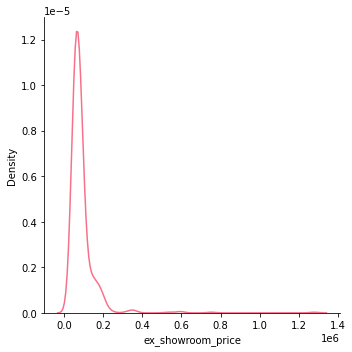

In [ ]:
sns.set_palette("husl")
sns.displot(data=MD, x="ex_showroom_price", kind="kde")

In [ ]:
MD['ex_showroom_price'].fillna(lambda x: random.choice(Md[MD[column] != np.nan]["ex_showroom_price"]), inplace =True)


the best thing we can do is to put a random value in the ex_showroom_price if we put an mean or miden or mode it will affect the data

In [ ]:
MD.isna().sum()* 100 / len(MD)
# no null

name                 0.0
selling_price        0.0
year                 0.0
seller_type          0.0
owner                0.0
km_driven            0.0
ex_showroom_price    0.0
dtype: float64

now we need to see the data types 

In [ ]:
MD.dtypes

name                 object
selling_price         int64
year                  int64
seller_type          object
owner                object
km_driven             int64
ex_showroom_price    object
dtype: object

the are 2 problems hear the:
 

1.  ex_showroom_price  it is  object we need it float64 
2.  owner object we will make it int so it is easer ser to read 




In [ ]:
MD['owner']

0       1st owner
1       1st owner
2       1st owner
3       1st owner
4       2nd owner
          ...    
1056    1st owner
1057    1st owner
1058    2nd owner
1059    1st owner
1060    1st owner
Name: owner, Length: 1055, dtype: object

In [ ]:

MD.owner.value_counts()

1st owner    918
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [ ]:
MD['owner'] = MD['owner'].str[0]

In [ ]:
MD['owner']=pd.to_numeric(MD['owner'], errors='coerce')

In [ ]:
MD.owner.value_counts()

1    918
2    123
3     11
4      3
Name: owner, dtype: int64

In [ ]:
MD['owner']=pd.to_numeric(MD['owner'], errors='coerce')

In [ ]:
MD['ex_showroom_price']=pd.to_numeric(MD['ex_showroom_price'], errors='coerce')

In [ ]:
MD.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                  int64
km_driven              int64
ex_showroom_price    float64
dtype: object

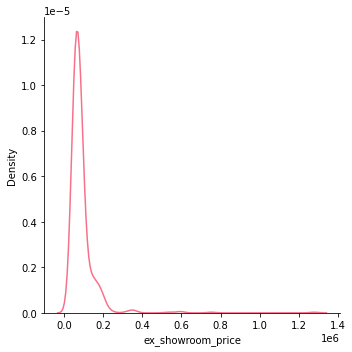

In [ ]:
sns.set_palette("husl")
sns.displot(data=MD, x="ex_showroom_price", kind="kde")
# hear we checked if ex_showroom_price has changed when we put randem vales

In [ ]:
MD.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

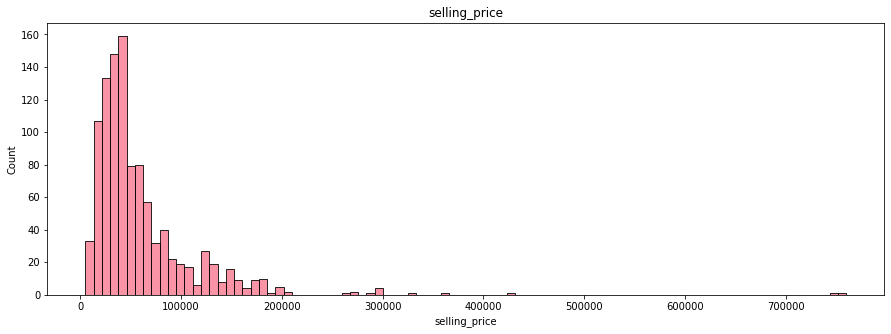

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('selling_price')
sns.histplot(MD.selling_price);

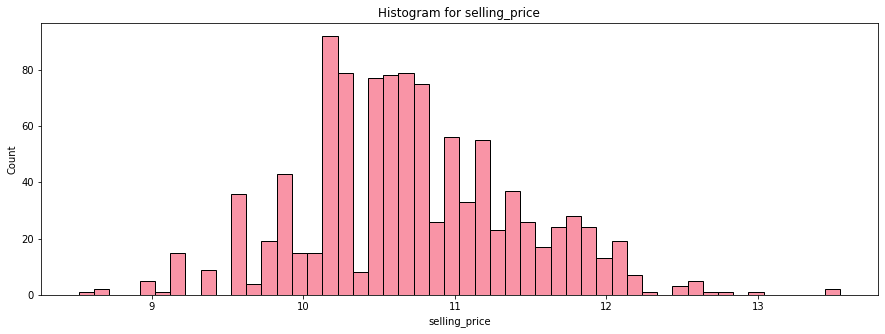

In [ ]:
price_logs = np.log1p(MD.selling_price)
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(price_logs, bins=50)
plt.title('Histogram for selling_price')
plt.xlabel('selling_price');

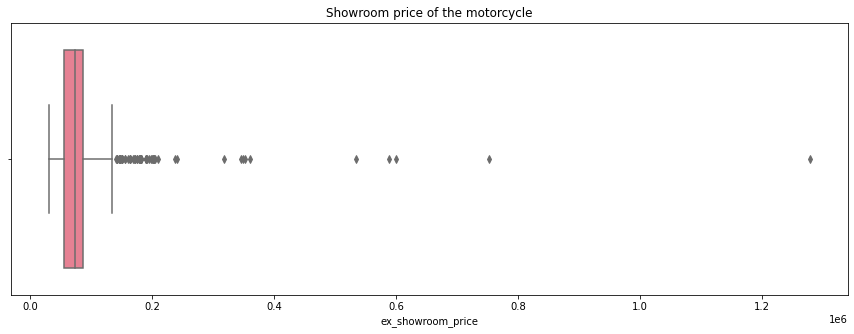

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Showroom price of the motorcycle')
sns.boxplot(data = MD, x = "ex_showroom_price");

Showroom price of the motorcycle has a very high range of prices so it is normal to have a lot of outliers 

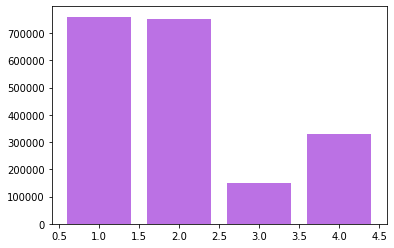

In [ ]:
plt.bar(x = MD["owner"],
        height = MD["selling_price"], 
        color = "#BB71E4")
plt.show() 
#we can clearly see that the selling price of the 1 and 2 owner is much higher than the 3 and 4

In [ ]:
import plotly.express as px
px.sunburst(MD, path=['seller_type'], values='selling_price', title=' seller_type')
#we can see that most sellers are individuals

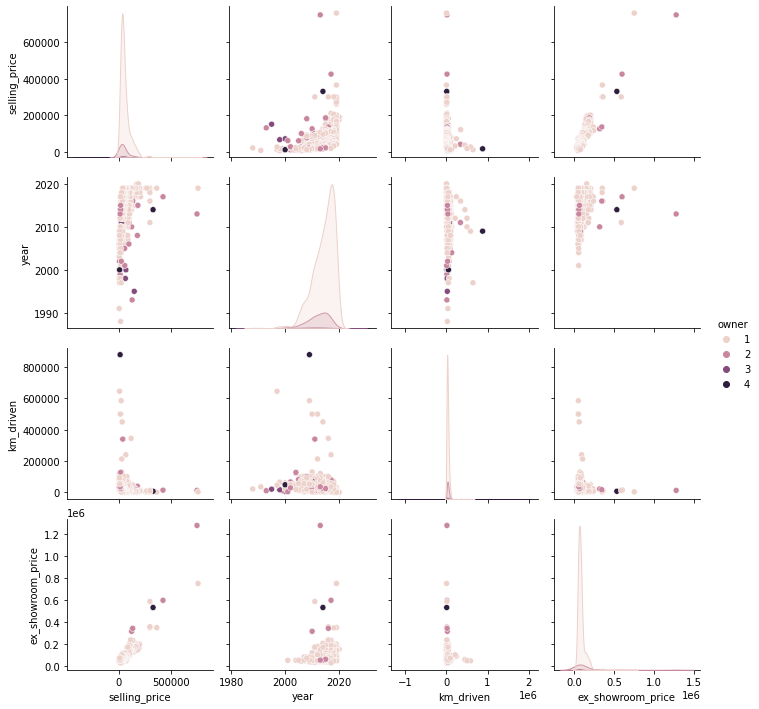

In [ ]:
sns.pairplot(MD, hue='owner')

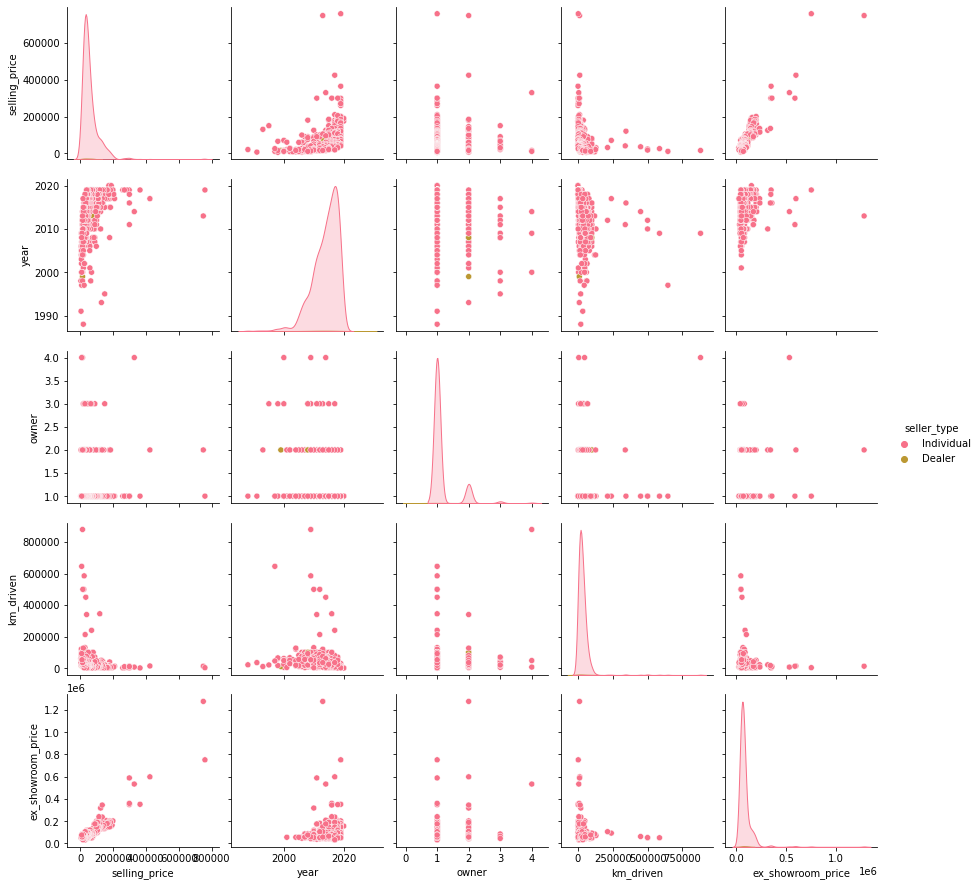

In [ ]:
sns.pairplot(MD, hue='seller_type')

# A4

In [ ]:
MD2=MD

In [ ]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
MD['seller_type']= label_encoder.fit_transform(MD['seller_type'])
  
MD['seller_type'].unique()

array([1, 0])

In [ ]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
MD['name']= label_encoder.fit_transform(MD['name'])
  
MD['name'].unique()

array([179, 145, 183, 260, 269, 135, 131, 177,  73,  21, 254, 152,  12,
       277, 157, 202,  77, 274, 255, 102, 153, 128, 158, 197, 147, 215,
       261,  87,  67, 252, 120, 155, 133, 126, 143,  82,  28,  68, 162,
       105, 251,  60, 271,  17, 134, 190, 111,  83,  35, 176,  36, 124,
        92, 210, 189, 227, 174, 214,  45, 198, 208,  80,  54, 112, 137,
        74, 129, 229,  63, 127, 123, 203,  43, 125,  47, 182, 205, 217,
        53, 240,  69,   2,  23, 130, 244, 121, 241, 154,  10, 187,  37,
        57, 164, 160,  94, 180, 166, 207, 201, 272, 165,  15,  85,  34,
       267,  25, 221, 245, 268, 141,  19, 138, 276, 231,  14,  78,   9,
       265,  26,  31, 178,  41,  29, 103,  13, 114,  81,  27, 247,  16,
       100,  42,  98, 219, 115, 253,  89,  70, 193,  30, 116,  24, 194,
        97, 122, 161, 171, 169, 238,  48, 204, 228, 266,  33, 259,  56,
       119, 213,  88, 256, 234, 275, 225,   3, 199,  44, 106,  93,  76,
       243, 113, 192, 236,  18,  64, 186, 139, 273, 209,  99,  9

In [ ]:
X = MD.iloc[:, :-1].values
y = MD.iloc[:, -1].values

In [ ]:
MD.dtypes

name                   int64
selling_price          int64
year                   int64
seller_type            int64
owner                  int64
km_driven              int64
ex_showroom_price    float64
dtype: object

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:

MD.dropna(inplace=True)

# Split the dataset into train and test sets
X = MD.drop('ex_showroom_price', axis=1)
y = MD['ex_showroom_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8733577959767705

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1938524910.9105806

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

17336.353376355604